In [1]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

This is my preliminary data analysis of this data set (https://www.kaggle.com/danerbland/electionfinance/data). I am using the datascience module from Data8 class so if the code looks unfamiliar please ask me for some clarification, although I trust you can all figure it out by context. I plan to show the differences in campaign donations between winners and losers in both the house and senate across several variables. As you can see, some of the following datasets are commented out using the '#' symbol. Simply delete it and run the cell to see the table. 

## Original Dataset

In [2]:
finance_results = Table.read_table('CandidateSummaryAction1.csv')
#finance_results

## Smaller Dataset

In [3]:
finance_results_2 = finance_results.drop(4,6,7,8,9,10,11)
finance_results_2

can_id,can_nam,can_off,can_off_sta,can_par_aff,ind_ite_con,ind_uni_con,ind_con,par_com_con,oth_com_con,can_con,tot_con,tra_fro_oth_aut_com,can_loa,oth_loa,tot_loa,off_to_ope_exp,off_to_fun,off_to_leg_acc,oth_rec,tot_rec,ope_exp,exe_leg_acc_dis,fun_dis,tra_to_oth_aut_com,can_loa_rep,oth_loa_rep,tot_loa_rep,ind_ref,par_com_ref,oth_com_ref,tot_con_ref,oth_dis,tot_dis,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,deb_owe_to_com,cov_sta_dat,cov_end_dat,winner,votes
H2GA12121,"ALLEN, RICHARD W",H,GA,REP,"$554,305.00","$46,969.50","$601,274.50",nan,"$473,675.00",nan,"$1,074,949.50","$17,710.49",nan,nan,nan,"$1,362.77",nan,nan,nan,"$1,094,022.76","$908,518.98",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"$70,000.00","$978,518.98","$60,109.57","$175,613.35","$1,074,949.50","$907,156.21","$1,125,000.00",nan,1/1/2015,10/19/2016,Y,158708
H6PA02171,"EVANS, DWIGHT",H,PA,DEM,"$1,042,280.38","$72,430.64","$1,114,711.02",nan,"$302,834.20",nan,"$1,417,545.22",nan,nan,nan,nan,"$1,725.70",nan,nan,nan,"$1,419,270.92","$1,300,557.53",nan,nan,nan,nan,nan,nan,"$9,326.16",nan,"$1,500.00","$10,826.16","$2,200.00","$1,313,583.69",nan,"$105,687.23","$1,406,719.06","$1,298,831.83",nan,nan,11/2/2015,10/19/2016,Y,310770
H6FL04105,"RUTHERFORD, JOHN",H,FL,REP,"$529,030.38","$13,075.00","$542,105.38",nan,"$106,050.00","$2,700.00","$650,855.38",nan,"$60,000.00",nan,"$60,000.00",$432.47,nan,nan,nan,"$711,287.85","$656,642.76",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"$19,000.00","$675,642.76",nan,"$35,645.09","$650,855.38","$656,210.29","$60,000.00",nan,4/1/2016,10/19/2016,Y,286018
H4MT01041,"ZINKE, RYAN K",H,MT,REP,"$2,479,616.45","$1,837,715.13","$4,317,331.58","$3,545.32","$660,038.51",nan,"$4,980,915.41","$136,894.00",nan,nan,nan,"$17,168.18",nan,nan,"$55,910.19","$5,190,887.78","$5,073,110.33",nan,nan,nan,"$42,000.00",nan,"$42,000.00","$38,471.67",nan,"$3,500.00","$41,971.67","$43,548.00","$5,200,630.00","$83,815.78","$399,122.61","$4,938,943.74","$5,055,942.15",nan,nan,1/1/2015,10/19/2016,Y,280476
H8CA09060,"LEE, BARBARA",H,CA,DEM,"$746,233.93","$150,889.68","$897,123.61",nan,"$308,740.00",nan,"$1,205,863.61",nan,nan,nan,nan,"$3,947.96",nan,nan,nan,"$1,209,811.57","$953,436.94",nan,nan,nan,nan,nan,nan,"$8,187.00",nan,nan,"$8,187.00","$150,540.00","$1,112,163.94","$83,690.60","$181,338.23","$1,197,676.61","$949,488.98","$4,401.75",nan,1/1/2015,10/19/2016,Y,277390
H6NC04037,"PRICE, DAVID E.",H,NC,DEM,"$256,364.26","$72,440.26","$328,804.52",$300.00,"$399,750.00",nan,"$728,854.52",nan,nan,nan,nan,"$4,862.09",nan,nan,nan,"$733,716.61","$435,688.13",nan,nan,$264.85,nan,nan,nan,"$3,000.00",nan,nan,"$3,000.00","$236,885.00","$675,837.98","$216,409.21","$274,287.84","$725,854.52","$430,826.04",nan,nan,1/1/2015,10/19/2016,Y,275501
H2WI02124,"POCAN, MARK",H,WI,DEM,"$239,089.22","$154,784.61","$393,873.83",$28.54,"$576,645.00",nan,"$970,547.37",nan,nan,nan,nan,$27.00,nan,nan,nan,"$970,574.37","$445,465.15",nan,nan,nan,nan,nan,nan,$162.33,nan,nan,$162.33,"$300,275.96","$745,903.44","$187,549.87","$412,220.80","$970,385.04","$445,438.15",nan,nan,1/1/2015,10/19/2016,Y,273520
H2MA09072,"LYNCH, STEPHEN",H,MA,DEM,"$707,366.10","$59,683.46","$767,049.56",nan,"$325,220.00",nan,"$1,092,269.56",nan,nan,nan,nan,"$4,845.55",nan,nan,nan,"$1,097,115.11","$464,636.23",nan,nan,nan,nan,nan,nan,$51.00,nan,nan,$51.00,"$28,360.00","$493,047.23","$406,586.74","$1,010,654.62","$1,092,218.56","$459,790.68",nan,"$1,750.00",1/1/2015,10/19/2016,Y,267944
H6OR02116,"WALDEN, GREGORY P MR.",H,OR,REP,"$827,711.91","$141,725.12","$969,437.03",nan,"$2,042,913.61",nan,"$3,012,350.64","$94,317.84",nan,nan,nan,"$26,478.50",nan,nan,$981.88,"$3,134,128.86","$1,937,694.04",nan,nan,nan,nan,nan,nan,"$5,200.00",nan,"$2,500.00","$7,700.00","$921,525.73","$2,866,919.77","$997,259.73","$1,264,468.82","$3,004,650.64","$1,911,215.54",nan,nan,1/1/2015,10/19/2016,Y,267179
H2MA04073,"KENNEDY, JOSEPH P III",H,MA,DEM,"$1,887,969.18","$50,223.20","$1,938,192.38",nan,"$859,775.00",nan,"$2,797

In [4]:
winners = finance_results_2.where('winner','Y')
#winners

In [5]:
losers = finance_results_2.where('winner', are.not_equal_to('Y'))
#losers

## Variables of Interest

1. ind_ite_con: Total individual, itemized contributions of amounts over $200.
2. par_com_con: Contributions from the party committe
3. oth_com_con: Contributions from PAC’s and other groups
4. cas_on_hand_beg_of_per: Candidate’s cash on hand at the beginning of the election period
5. cas_on_hand_clo_of_per: Candidate's cash on hand at the close of the election period

## Cleaning the Data

In [6]:
def data_cleaning(column):
    new_column = make_array()
    for item in column:
        new_item = ''
        for letter in item:
            if letter != ',' and letter != '(' and letter != ")" and letter != "$":
                new_item += letter
        new_column = np.append(new_column, float(new_item))
    return new_column

## Calculating Statistics "ind_ite_con" Variable

In [7]:
house_winners = winners.where('can_off', 'H')

In [8]:
senate_winners = winners.where('can_off', 'S')

In [9]:
house_losers = losers.where('can_off', 'H')

In [10]:
senate_losers = losers.where('can_off', 'S')

In [11]:
house_winners_ind_ite_con_clean = data_cleaning(house_winners.where('ind_ite_con', are.not_equal_to('nan')).column('ind_ite_con'))
house_winner_mean = np.mean(house_winners_ind_ite_con_clean)

In [12]:
house_losers_ind_ite_con_clean = data_cleaning(house_losers.where('ind_ite_con', are.not_equal_to('nan')).column('ind_ite_con'))
house_loser_mean = np.mean(house_losers_ind_ite_con_clean)

In [13]:
senate_winners_ind_ite_con_clean = data_cleaning(senate_winners.where('ind_ite_con', are.not_equal_to('nan')).column('ind_ite_con'))
senate_winner_mean = np.mean(senate_winners_ind_ite_con_clean)

In [14]:
senate_losers_ind_ite_con_clean = data_cleaning(senate_losers.where('ind_ite_con', are.not_equal_to('nan')).column('ind_ite_con'))
senate_loser_mean = np.mean(senate_losers_ind_ite_con_clean)

## Data Visualization "ind_ite_con" Variable

In [15]:
senate_ind_ite_con = Table().with_column('Senate Outcome', make_array('Winner', 'Loser')).with_column('Mean', make_array(senate_winner_mean, senate_loser_mean))

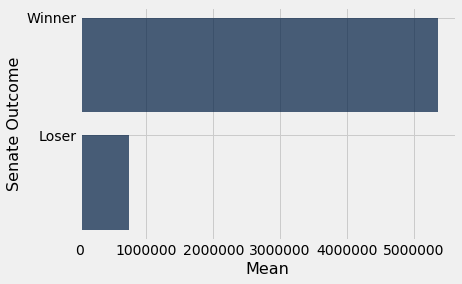

In [16]:
senate_ind_ite_con.barh('Senate Outcome')

In [17]:
house_ind_ite_con = Table().with_column('House Outcome', make_array('Winner', 'Loser')).with_column('Mean', make_array(house_winner_mean, house_loser_mean))

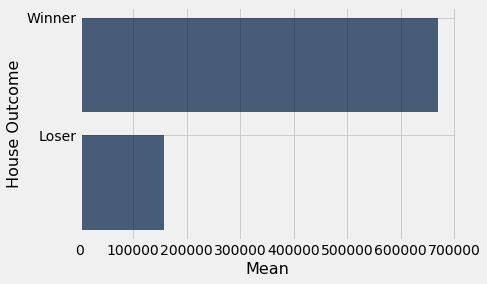

In [18]:
house_ind_ite_con.barh('House Outcome')

## Calculating Statistics for "par_com_con" Variable

In [19]:
house_winners_par_com_con_clean = data_cleaning(house_winners.where('par_com_con', are.not_equal_to('nan')).column('par_com_con'))
house_winners_mean_par_con = np.mean(house_winners_par_com_con_clean)

In [20]:
house_losers_par_com_con_clean = data_cleaning(house_losers.where('par_com_con', are.not_equal_to('nan')).column('par_com_con'))
house_losers_mean_par_con = np.mean(house_losers_par_com_con_clean)

In [21]:
senate_winners_par_com_con_clean = data_cleaning(senate_winners.where('par_com_con', are.not_equal_to('nan')).column('par_com_con'))
senate_winners_mean_par_con = np.mean(senate_winners_par_com_con_clean)

In [22]:
senate_losers_par_com_con_clean = data_cleaning(senate_losers.where('par_com_con', are.not_equal_to('nan')).column('par_com_con'))
senate_losers_mean_par_con = np.mean(senate_losers_par_com_con_clean)

## Data Visualization for "par_com_con" Variable

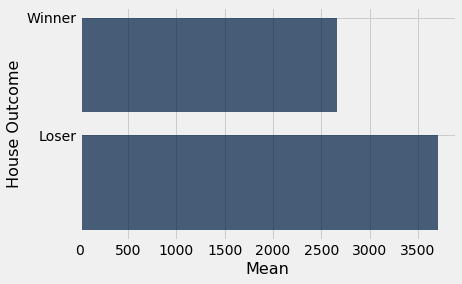

In [23]:
house_par_com_con = Table().with_column('House Outcome', make_array('Winner', 'Loser')).with_column('Mean', make_array(house_winners_mean_par_con, house_losers_mean_par_con))
house_par_com_con.barh('House Outcome')

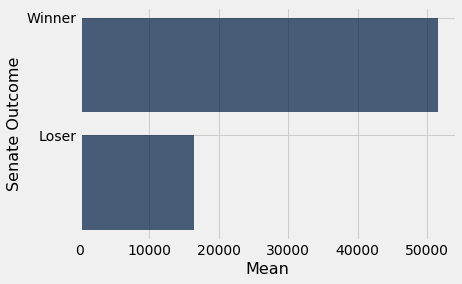

In [24]:
senate_par_com_con = Table().with_column('Senate Outcome', make_array('Winner', 'Loser')).with_column('Mean', make_array(senate_winners_mean_par_con, senate_losers_mean_par_con))
senate_par_com_con.barh('Senate Outcome')

## Creating Statistics for "oth_com_con" Variable

In [25]:
house_winners_oth_com_con_clean = data_cleaning(house_winners.where('oth_com_con', are.not_equal_to('nan')).column('oth_com_con'))
house_winners_mean_oth_con = np.mean(house_winners_oth_com_con_clean)

In [26]:
house_losers_oth_com_con_clean = data_cleaning(house_losers.where('oth_com_con', are.not_equal_to('nan')).column('oth_com_con'))
house_losers_mean_oth_con = np.mean(house_losers_oth_com_con_clean)

In [27]:
senate_winners_oth_com_con_clean = data_cleaning(senate_winners.where('oth_com_con', are.not_equal_to('nan')).column('oth_com_con'))
senate_winners_mean_oth_con = np.mean(senate_winners_oth_com_con_clean)

In [28]:
senate_losers_oth_com_con_clean = data_cleaning(senate_losers.where('oth_com_con', are.not_equal_to('nan')).column('oth_com_con'))
senate_losers_mean_oth_con = np.mean(senate_losers_oth_com_con_clean)

## Data Vizualization for "oth_com_con" Variable

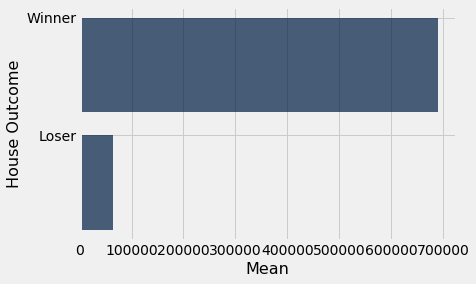

In [29]:
house_oth_com_con = Table().with_column('House Outcome', make_array('Winner', 'Loser')).with_column('Mean', make_array(house_winners_mean_oth_con, house_losers_mean_oth_con))
house_oth_com_con.barh('House Outcome')

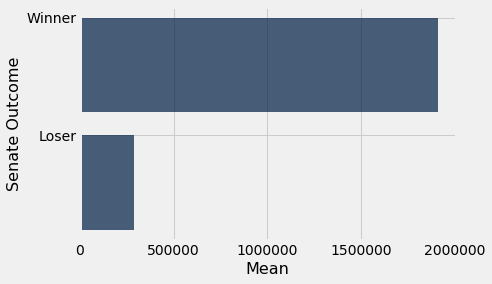

In [30]:
senate_oth_com_con = Table().with_column('Senate Outcome', make_array('Winner', 'Loser')).with_column('Mean', make_array(senate_winners_mean_oth_con, senate_losers_mean_oth_con))
senate_oth_com_con.barh('Senate Outcome')

## Creating Statistics for "cas_on_hand_beg_of_per" Variable

In [31]:
house_winners_cas_beg_per_clean = data_cleaning(house_winners.where('cas_on_han_beg_of_per', are.not_equal_to('nan')).column('cas_on_han_beg_of_per'))
house_winners_mean_cas_beg_per = np.mean(house_winners_cas_beg_per_clean)

In [32]:
house_losers_cas_beg_per_clean = data_cleaning(house_losers.where('cas_on_han_beg_of_per', are.not_equal_to('nan')).column('cas_on_han_beg_of_per'))
house_losers_mean_cas_beg_per = np.mean(house_losers_cas_beg_per_clean)

In [33]:
senate_winners_cas_beg_per_clean = data_cleaning(senate_winners.where('cas_on_han_beg_of_per', are.not_equal_to('nan')).column('cas_on_han_beg_of_per'))
senate_winners_mean_cas_beg_per = np.mean(senate_winners_cas_beg_per_clean)

In [34]:
senate_losers_cas_beg_per_clean = data_cleaning(senate_losers.where('cas_on_han_beg_of_per', are.not_equal_to('nan')).column('cas_on_han_beg_of_per'))
senate_losers_mean_cas_beg_per = np.mean(senate_losers_cas_beg_per_clean)

## Data Visualization for "cas_on_han_beg_of_per" Variable

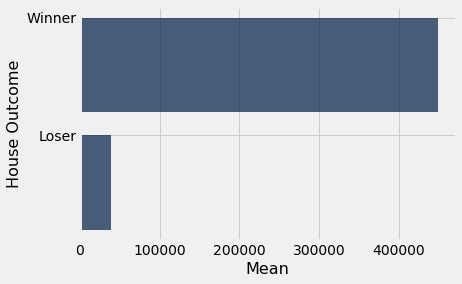

In [35]:
house_cas_beg_per = Table().with_column('House Outcome', make_array('Winner', 'Loser')).with_column('Mean', make_array(house_winners_mean_cas_beg_per, house_losers_mean_cas_beg_per))
house_cas_beg_per.barh('House Outcome')

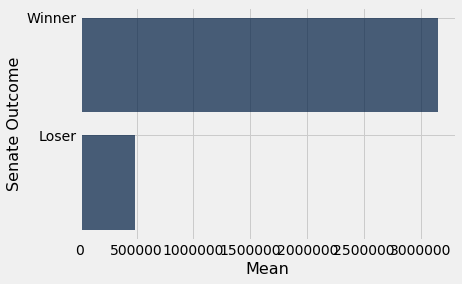

In [36]:
senate_cas_beg_per = Table().with_column('Senate Outcome', make_array('Winner', 'Loser')).with_column('Mean', make_array(senate_winners_mean_cas_beg_per, senate_losers_mean_cas_beg_per))
senate_cas_beg_per.barh('Senate Outcome')

## Creating Statistics for "cas_on_han_clo_of_per" Variable

In [37]:
house_winners_cas_clo_per_clean = data_cleaning(house_winners.where('cas_on_han_clo_of_per', are.not_equal_to('nan')).column('cas_on_han_clo_of_per'))
house_winners_mean_cas_clo_per = np.mean(house_winners_cas_clo_per_clean)

In [38]:
house_losers_cas_clo_per_clean = data_cleaning(house_losers.where('cas_on_han_clo_of_per', are.not_equal_to('nan')).column('cas_on_han_clo_of_per'))
house_losers_mean_cas_clo_per = np.mean(house_losers_cas_clo_per_clean)

In [39]:
senate_winners_cas_clo_per_clean = data_cleaning(senate_winners.where('cas_on_han_clo_of_per', are.not_equal_to('nan')).column('cas_on_han_clo_of_per'))
senate_winners_mean_cas_clo_per = np.mean(senate_winners_cas_clo_per_clean)

In [40]:
senate_losers_cas_clo_per_clean = data_cleaning(senate_losers.where('cas_on_han_clo_of_per', are.not_equal_to('nan')).column('cas_on_han_clo_of_per'))
senate_losers_mean_cas_clo_per = np.mean(senate_losers_cas_clo_per_clean)

## Data Visualization for "cas_on_han_clo_of_per" Variable

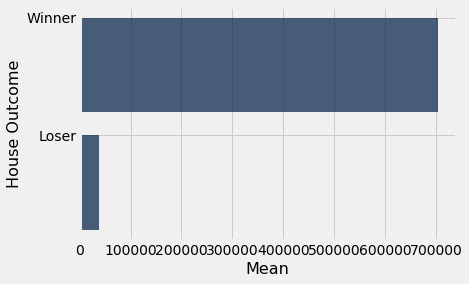

In [41]:
house_cas_clo_per = Table().with_column('House Outcome', make_array('Winner', 'Loser')).with_column('Mean', make_array(house_winners_mean_cas_clo_per, house_losers_mean_cas_clo_per))
house_cas_clo_per.barh('House Outcome')

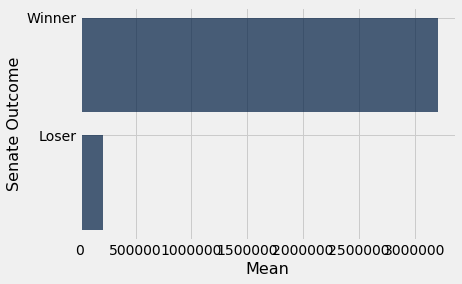

In [42]:
senate_cas_clo_per = Table().with_column('Senate Outcome', make_array('Winner', 'Loser')).with_column('Mean', make_array(senate_winners_mean_cas_clo_per, senate_losers_mean_cas_clo_per))
senate_cas_clo_per.barh('Senate Outcome')

## Initial Conclusions

Winners in both houses drastically outraise their losing counterparts in all but one instance. House losers received more money from party contributions on average than House winners did. This is in line with the statistic that 90% of the time, the candidate that spends more money wins the election. In oreder to spend more money, you must raise more money. However, this is a very high level overview of the entire country's candidates from both parties. My next step is to look at which variable is more correlated with vicytory by calculating the percentage of the time that the winner outraised the runner-up in that variable.

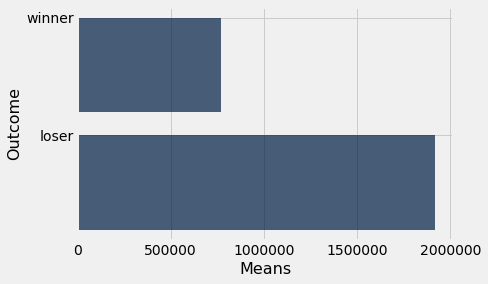

In [43]:
def state_by_state(state, var, house):
    state_dataset = finance_results_2.where('can_off_sta', are.equal_to(state)).where('can_off', are.equal_to(house))
    state_winner_data = state_dataset.where('winner', are.equal_to('Y'))
    state_loser_data = state_dataset.where('winner', are.not_equal_to('Y'))
    winner_var = np.mean(data_cleaning(state_winner_data.where(var, are.not_equal_to('nan')).column(var)))
    loser_var = max(data_cleaning(state_loser_data.where(var, are.not_equal_to('nan')).column(var)))
    state_table = Table().with_column("Outcome", make_array('winner', 'loser')).with_column("Means", make_array(winner_var, loser_var))
    return state_table.barh('Outcome')

state_by_state('CA', 'ind_ite_con', 'H')

In [44]:
non_state_array = make_array('AS', 'DC', 'GU', 'VI', 'PR', 'MP', 'US')
state_array = finance_results_2.group('can_off_sta').where('can_off_sta', are.not_contained_in(non_state_array)).column('can_off_sta')

In [45]:
def data_cleaning_2(column):
    new_column = make_array()
    for item in column:
        if item == '$0.00':
            new_item = 1
        elif item == 'nan':
            new_item = 0
        else:
            new_item = ''
            for letter in item:
                if letter != ',' and letter != '(' and letter != ")" and letter != "$":
                    new_item += letter
        new_column = np.append(new_column, float(new_item))
    return new_column

In [46]:
finance_table_cleaned = Table().with_columns('Candidate Office', finance_results_2.column(2),
                                       'District', finance_results.column('can_off_dis'),
                                       'State', finance_results_2.column(3),
                                       'Individual Itemized Contributions', data_cleaning_2(finance_results_2.column('ind_ite_con')),
                                       'Party Committee Contributions', data_cleaning_2(finance_results_2.column(8)),
                                       'Other Committee Contributions', data_cleaning_2(finance_results_2.column('oth_com_con')),
                                       'Candidate Contribution', data_cleaning_2(finance_results_2.column('can_con')),
                                        'Total Contributions', data_cleaning_2(finance_results_2.column('tot_con')),
                                       'Winner', finance_results.column('winner'))

In [47]:
finance_table_cleaned

Candidate Office,District,State,Individual Itemized Contributions,Party Committee Contributions,Other Committee Contributions,Candidate Contribution,Total Contributions,Winner
H,12,GA,554305,0,473675,0,1.07495e+06,Y
H,2,PA,1.04228e+06,0,302834,0,1.41755e+06,Y
H,4,FL,529030,0,106050,2700,650855,Y
H,0,MT,2.47962e+06,3545.32,660039,0,4.98092e+06,Y
H,13,CA,746234,0,308740,0,1.20586e+06,Y
H,4,NC,256364,300,399750,0,728855,Y
H,2,WI,239089,28.54,576645,0,970547,Y
H,8,MA,707366,0,325220,0,1.09227e+06,Y
H,2,OR,827712,0,2.04291e+06,0,3.01235e+06,Y
H,4,MA,1.88797e+06,0,859775,0,2.79797e+06,Y


In [48]:
def senate_winner(state):
    winners = finance_table_cleaned.where('Winner', 'Y').where('Candidate Office', 'S').where('State', state)
    return winners

In [49]:
def senate_runner_up(state):
    runners_up = finance_table_cleaned.where('Winner', are.not_equal_to('Y')).where('Candidate Office', are.equal_to('S')).where('State', are.equal_to(state)).where('Total Contributions', are.not_equal_to(0))
    if runners_up.num_rows >0:
        runner_up = runners_up.sort("Total Contributions", descending = True).take(0)
    else:
        runner_up = runners_up.where("Candidate Office", 'Q')
    return runner_up

In [50]:
def senate_percentage_per_variable(variable):
    senate_count = 0
    num_races = 0
    for state in state_array:
        senate_winners = senate_winner(state)
        runner_up = senate_runner_up(state)
        
        if len(senate_winners.where(variable, are.not_equal_to(0)).column(variable)) > 0:
            senate_winner_num = np.mean((senate_winners.where(variable, are.not_equal_to(0)).column(variable)))
        else: senate_winner_num = 0
        
        if len(runner_up.where(variable, are.not_equal_to(0)).column(variable)) > 0:
            runner_up_num = runner_up.column(variable).item(0)
        else:
            runner_up_num = 0
        
        if senate_winner_num != 0 and runner_up_num !=0:
            ratio_var = senate_winner_num / runner_up_num
            num_races += 1
        else:
            ratio_var = 0
            num_races += 0
        
        if ratio_var >1:
            senate_count += 1
        else:
            senate_count += 0
    senate_percent = (senate_count / num_races) * 100
    return senate_percent

In [51]:
variables_array = make_array('Individual Itemized Contributions',
                             'Party Committee Contributions',
                             'Other Committee Contributions',
                             'Candidate Contribution',
                             'Total Contributions')

percentages_array = make_array()

for i in variables_array:
    percentages_array = np.append(percentages_array, senate_percentage_per_variable(i))
    
senate_table = Table().with_columns('Sources', variables_array, 'Percentages', percentages_array)

In [52]:
def house_winners(state):
    winners = finance_table_cleaned.where('Candidate Office', 'H').where('State', state).where('Winner', 'Y')
    return winners.sort('District')

In [53]:
def house_losers(state):
    losers = finance_table_cleaned.where('Candidate Office', 'H').where('State', state).where('Winner', are.not_equal_to('Y'))
    return losers.sort('District')

In [54]:
def house_percent_per_variable(variable):
    house_count = 0
    num_races = 0
    for state in state_array:
        districts = max(house_winners(state).column('District'))
        for district in np.arange(districts + 1):
            winner = house_winners(state).where('District', district)
            if house_losers(state).where('District', district).num_rows > 0:
                loser = house_losers(state).where('District', district).sort('Total Contributions', descending = True).take(0)
            else:
                loser = house_losers(state).where('Candidate Office', 'Q')
            
            if len(winner.where(variable, are.not_equal_to(0)).column(variable)) > 0:
                winner_num = winner.where(variable, are.not_equal_to(0)).column(variable).item(0)
            else: winner_num = 0
                
            if len(loser.where(variable, are.not_equal_to(0)).column(variable)) > 0:
                loser_num = loser.where(variable, are.not_equal_to(0)).column(variable).item(0)
            else:
                loser_num = 0
            
            if winner_num != 0 and loser_num !=0:
                ratio_var = winner_num / loser_num
                num_races += 1
            else:
                ratio_var = 0
                num_races += 0
                
            if ratio_var > 1:
                house_count += 1
            else:
                house_count += 0
                    
    house_percent = (house_count / num_races) * 100
    return house_percent

In [55]:
house_percentages_array = make_array()

for i in variables_array:
    house_percentages_array = np.append(house_percentages_array, house_percent_per_variable(i))
    
house_table = Table().with_columns('Sources', variables_array, 'Percentages', house_percentages_array)

Sources                           | Percentages
Total Contributions               | 85.2941
Other Committee Contributions     | 82.7586
Individual Itemized Contributions | 81.8182
Party Committee Contributions     | 56.25
Candidate Contribution            | 0


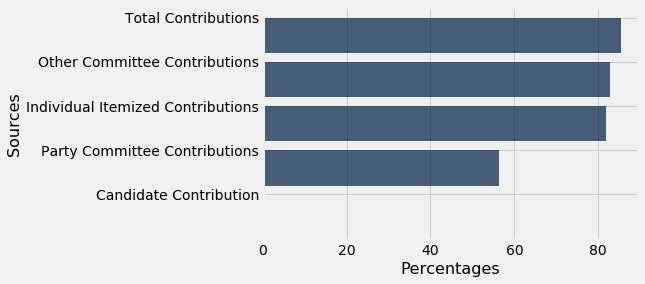

In [59]:
print(senate_table.sort('Percentages', descending = True))
senate_table.sort('Percentages', descending = True).barh('Sources')

Sources                           | Percentages
Other Committee Contributions     | 93.8053
Total Contributions               | 93.7158
Individual Itemized Contributions | 91.6905
Candidate Contribution            | 47.8261
Party Committee Contributions     | 37.2549


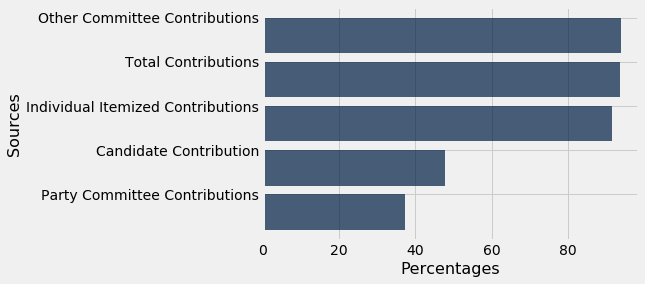

In [60]:
print(house_table.sort('Percentages', descending = True))
house_table.sort('Percentages', descending = True).barh('Sources')

## Final Conclusions

For each of the variables in the above two graphs, I calculated the percentage of the time in which the winner outraised the runner-up by defining the runner-up as the loser that raised the most money (highest value in the 'tot_con' column. First, I created a new table (finance_table_cleaned) in order to make math operations easier. I converted all the string entries in the original table to float values by taking out the dollar signs and commas. I also coded the nan values as 0 and the 0 dollar values as 1. Using this new table, created the function 'percentage_per_variable' for both the House and the Senate. For each of the varibles; Total Contributions, Other Committe Contributions, Party Committe Contributions, and Candidate Contributions, I calculated the percentage of races in which the winner outraised the loser. However, I only calculated this statistic for races in which there were two nonzero values. Therefore, the percentage values shown in the graphs and tables are not based on overall numbers, but only the comparable races. As you can see in the code for percent_per_variable, there are two zero counts defined at the beginning. One is called "house_count" or "senate_count", the other is called "num_races". The first is the number of races in which the winner outraised the loser, the second is the nubmer of races being compared. Based on this data I would say that Other Committe Contributions, i.e. SuperPACs, and Individual Itemized Contributions, those over $200 each, are the two funding sources most correlated with victory. Campaign Finance reform should be aimed at these two sources in order to reduce the influence of money on elections.